INSTALLING NECESSARY LIBRARY

In [2]:
!pip install librosa soundfile scipy


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
from scipy.signal import resample


IMPORTING AND READING THE SPEECH FILE


In [4]:
file_path = "/content/file_example_WAV_1MG.wav"

signal, sr = sf.read(file_path)

print("Sample Rate (Hz):", sr)
print("Number of Samples:", len(signal))
print("Total Duration (seconds):", len(signal) / sr)


Sample Rate (Hz): 44100
Number of Samples: 262094
Total Duration (seconds): 5.9431746031746036


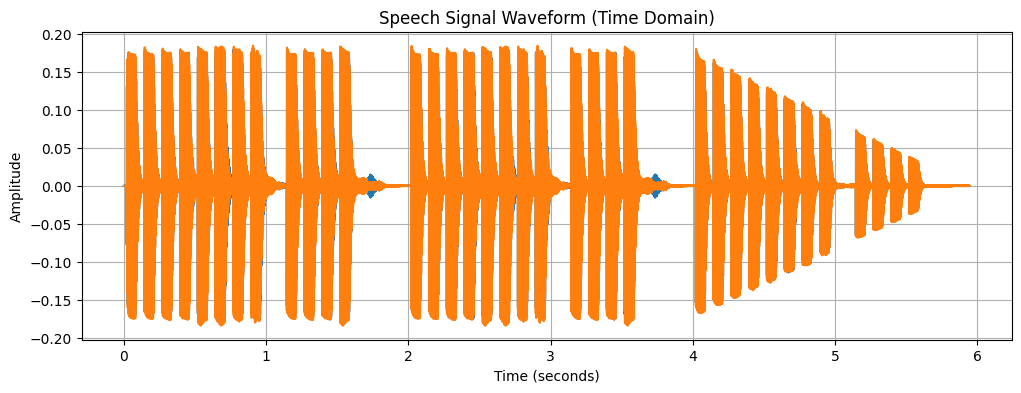

In [5]:
time = np.linspace(0, len(signal)/sr, len(signal))

plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Waveform (Time Domain)")
plt.grid()
plt.show()


In [6]:
energy = signal**2
threshold = 0.01 * np.max(energy)

active_samples = energy > threshold
active_duration = np.sum(active_samples) / sr

print("Active Speech Duration (seconds):", active_duration)


Active Speech Duration (seconds): 5.579387755102041


PERFOMING BASIC OPERATIONS

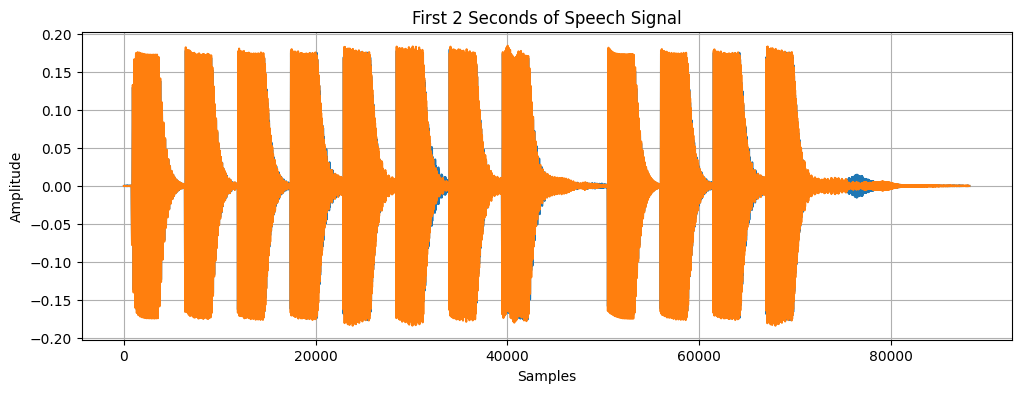

In [7]:
slice_2sec = signal[:2*sr]

plt.figure(figsize=(12,4))
plt.plot(slice_2sec)
plt.title("First 2 Seconds of Speech Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


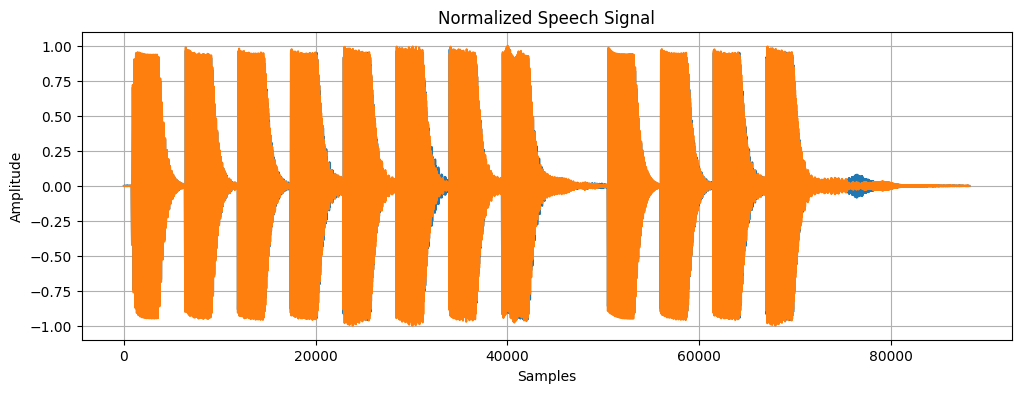

In [8]:
normalized_signal = slice_2sec / np.max(np.abs(slice_2sec))

plt.figure(figsize=(12,4))
plt.plot(normalized_signal)
plt.title("Normalized Speech Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


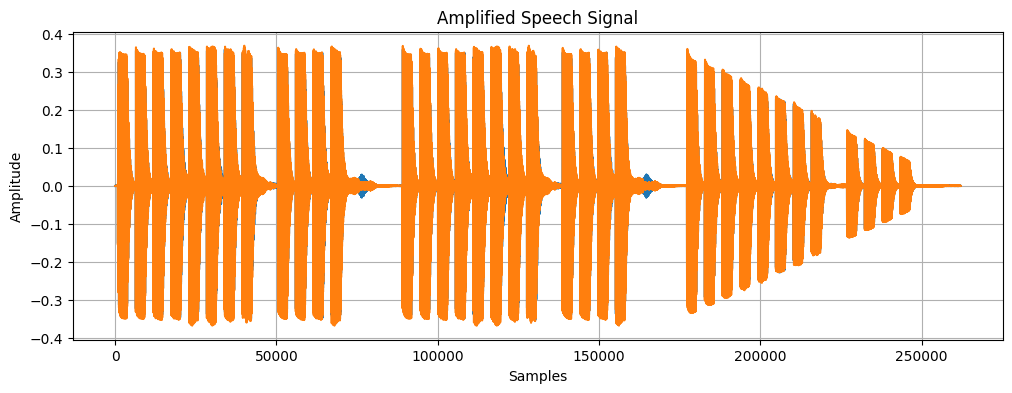

In [9]:
amplified_signal = signal * 2

plt.figure(figsize=(12,4))
plt.plot(amplified_signal)
plt.title("Amplified Speech Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


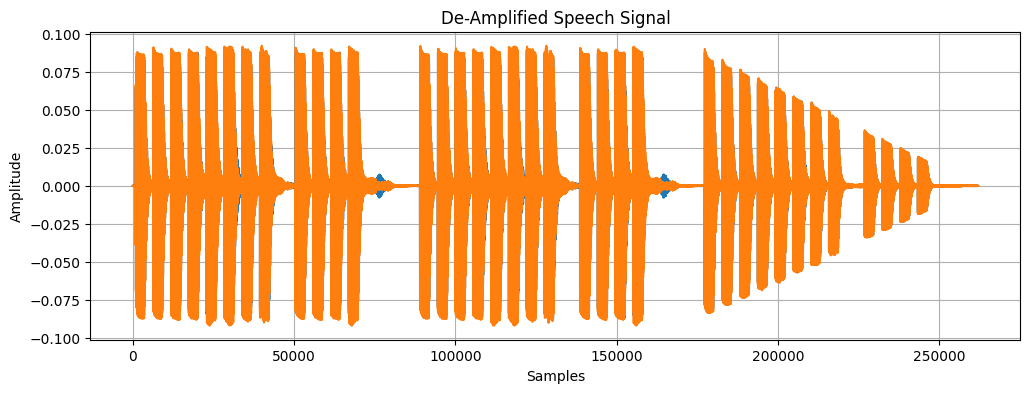

In [10]:
deamplified_signal = signal * 0.5

plt.figure(figsize=(12,4))
plt.plot(deamplified_signal)
plt.title("De-Amplified Speech Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


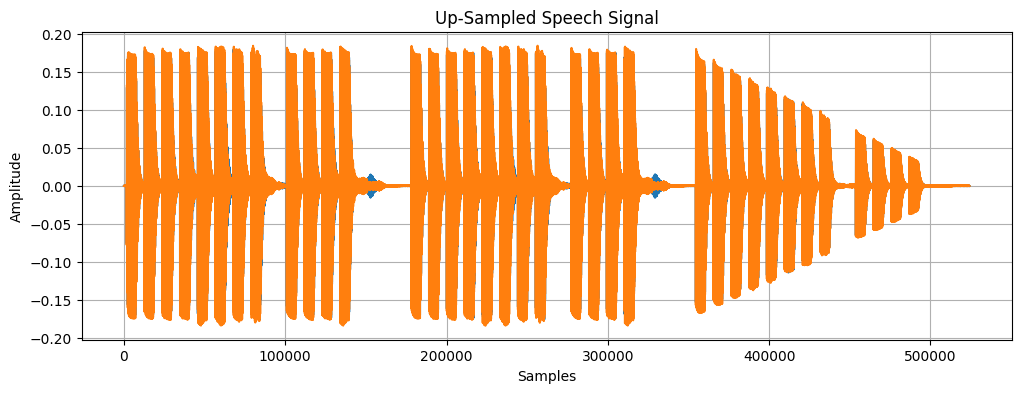

In [11]:
upsampled_signal = resample(signal, len(signal) * 2)

plt.figure(figsize=(12,4))
plt.plot(upsampled_signal)
plt.title("Up-Sampled Speech Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


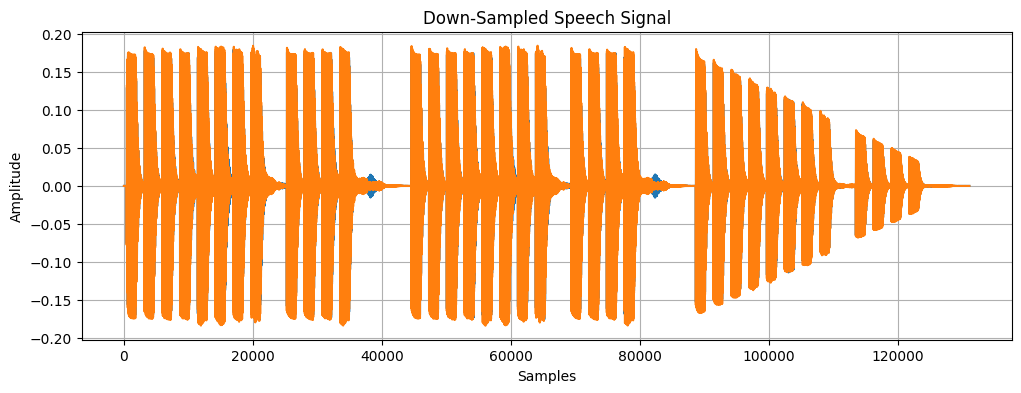

In [12]:
downsampled_signal = resample(signal, len(signal) // 2)

plt.figure(figsize=(12,4))
plt.plot(downsampled_signal)
plt.title("Down-Sampled Speech Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Voiced / Unvoiced / Silence Identification

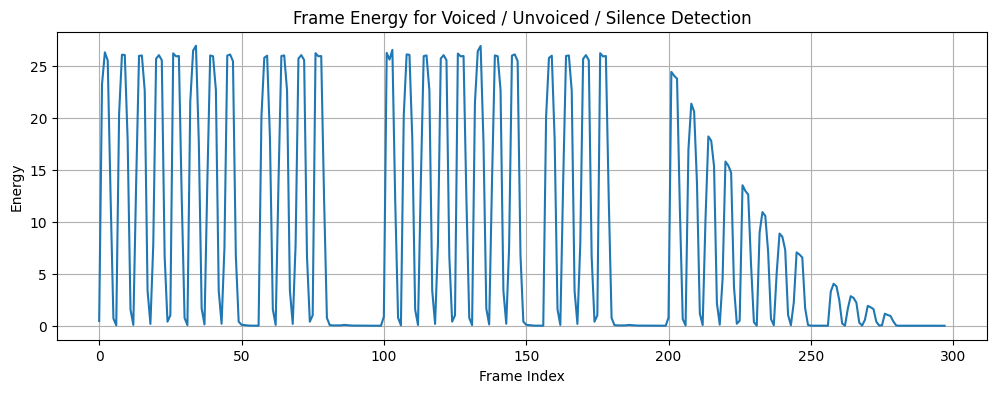

In [13]:
frame_length = int(0.02 * sr)  # 20 ms frames
frame_energy = []

for i in range(0, len(signal), frame_length):
    frame = signal[i:i+frame_length]
    frame_energy.append(np.sum(frame**2))

frame_energy = np.array(frame_energy)

plt.figure(figsize=(12,4))
plt.plot(frame_energy)
plt.xlabel("Frame Index")
plt.ylabel("Energy")
plt.title("Frame Energy for Voiced / Unvoiced / Silence Detection")
plt.grid()
plt.show()
